In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
data = pd.read_csv('../../data/train/dataset_all.csv')
data.head(5)

,file_name,file_type,file_diff_type,file_diff,commit_id,commit_type
0,.github/angular-robot.yml,.yml,2,"- mergeConflictComment: ""Hi @{{PRAuthor}}! ...",f815aa19914a8cd55dc8db2a41254248ee0b83c8,1
1,.ng-dev/caretaker.ts,.ts,1,- import {CaretakerConfig} from '../dev-infra...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,1
2,.ng-dev/config.ts,.ts,2,- import {caretaker} from './caretaker';- c...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,1
3,dev-infra/BUILD.bazel,.bazel,2,"- ""//dev-infra/caretaker"",",1523f217e27be965ae41a1d3973a0226ee646de8,2
4,dev-infra/caretaker/BUILD.bazel,.bazel,1,"- load(""@npm_bazel_typescript//:index.bzl"", ""...",1523f217e27be965ae41a1d3973a0226ee646de8,2


In [7]:
data.loc[data['commit_type'] == 1, 'commit_type'] = 'build'
data.loc[data['commit_type'] == 2, 'commit_type'] = 'ci'
data.loc[data['commit_type'] == 3, 'commit_type'] = 'docs'
data.loc[data['commit_type'] == 4, 'commit_type'] = 'feat'
data.loc[data['commit_type'] == 5, 'commit_type'] = 'fix'
data.loc[data['commit_type'] == 6, 'commit_type'] = 'perf'
data.loc[data['commit_type'] == 7, 'commit_type'] = 'refactor'
data.loc[data['commit_type'] == 8, 'commit_type'] = 'style'
data.loc[data['commit_type'] == 9, 'commit_type'] = 'test'

data

,file_name,file_type,file_diff_type,file_diff,commit_id,commit_type
0,.github/angular-robot.yml,.yml,2,"- mergeConflictComment: ""Hi @{{PRAuthor}}! ...",f815aa19914a8cd55dc8db2a41254248ee0b83c8,build
1,.ng-dev/caretaker.ts,.ts,1,- import {CaretakerConfig} from '../dev-infra...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,build
2,.ng-dev/config.ts,.ts,2,- import {caretaker} from './caretaker';- c...,f815aa19914a8cd55dc8db2a41254248ee0b83c8,build
3,dev-infra/BUILD.bazel,.bazel,2,"- ""//dev-infra/caretaker"",",1523f217e27be965ae41a1d3973a0226ee646de8,ci
4,dev-infra/caretaker/BUILD.bazel,.bazel,1,"- load(""@npm_bazel_typescript//:index.bzl"", ""...",1523f217e27be965ae41a1d3973a0226ee646de8,ci
...,...,...,...,...,...,...
191401,dev-infra/cli.ts,.ts,2,- import {buildCiParster} from './ci/cli';- ...,a4d3fadd31b491a2ca51c31323649fff0ff70159,ci
191402,dev-infra/utils/console.ts,.ts,2,- export const reset: typeof chalk = chalk.re...,a4d3fadd31b491a2ca51c31323649fff0ff70159,ci
191403,.circleci/bazel.windows.rc,.rc,2,+ # Save downloaded repositories in a locatio...,3730b2c8ea9e9fca3e8db54c1bbf17010d34e7c7,build
191404,.circleci/config.yml,.yml,2,- name: Build all windows CI target...,3730b2c8ea9e9fca3e8db54c1bbf17010d34e7c7,build


In [10]:
commits = data.groupby('commit_id', as_index=False).aggregate({'commit_type': 'first'})
commits

,commit_id,commit_type
0,0001dbdede720293a95faa75b6187f53c92c579d,ci
1,00027130ea06231d23865dbb7172c2ed10e58c1e,docs
2,0004896ff940881cf4bf6332f55da9dbe907cf51,build
3,00070376ed80eac6ab5cfcba92050986c3bda97d,fix
4,00075647beee171ae06476d647168e9687c47195,fix
...,...,...
28832,fff2ca540f61f7922d417118de4ec773792362a5,fix
28833,fff424a35f11fd062e74e1158de26368ff190c65,fix
28834,fff93ae8f3dac74d68770128345e06e41687659f,docs
28835,fff9bd8fba997d49b36c9cb798ec70f428d8f23e,docs


In [11]:
commits.groupby('commit_type', as_index=False).aggregate({'commit_id': 'count'}).rename(columns={'commit_id': 'count'})

,commit_type,count
0,build,5349
1,ci,3368
2,docs,7568
3,feat,2309
4,fix,6107
5,perf,393
6,refactor,2581
7,style,142
8,test,1020


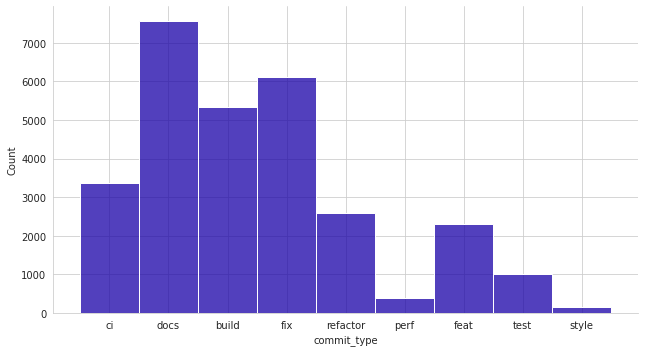

In [13]:
# commit types:
# 1) build: Changes that affect the build system or external dependencies (example scopes: gulp, broccoli, npm)
# 2) ci: Changes to our CI configuration files and scripts (example scopes: Travis, Circle, BrowserStack, SauceLabs)
# 3) docs: Documentation only changes
# 4) feat: A new feature
# 5) fix: A bug fix
# 6) perf: A code change that improves performance
# 7) refactor: A code change that neither fixes a bug nor adds a feature
# 8) style: Changes that do not affect the meaning of the code (white-space, formatting, missing semi-colons, etc)
# 9) test: Adding missing tests or correcting existing tests

sns.set_style("whitegrid")
sns.set_palette('nipy_spectral')
plt = sns.displot(commits, x='commit_type')
plt.fig.set_size_inches(10,5)
# plt.fig.savefig('../../data/images/type_analize/commit_types.png')

,fix_file_type,count
27,.ts,24424
16,.js,3457
17,.json,1028
8,.dart,553


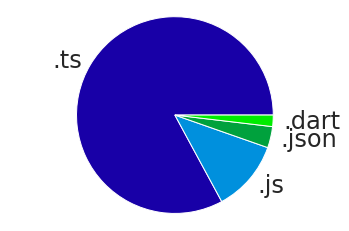

In [16]:
from matplotlib import pyplot as plt

fix_data = data[data.commit_type == 'fix']
fix_data = fix_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'fix_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(fix_data['count'], labels=fix_data['fix_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
# plt.savefig('../../data/images/type_analize/fix_types.png')
fix_data

,doc_file_type,count
28,.ts,12878
22,.md,7065
19,.json,1999
16,.html,1981


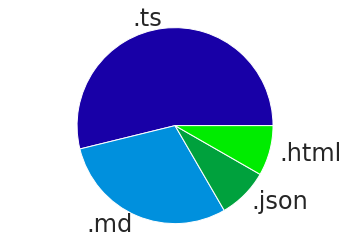

In [18]:
doc_data = data[data.commit_type == 'docs']
doc_data = doc_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'doc_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(doc_data['count'], labels=doc_data['doc_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/doc_types.png')
doc_data

,refactor_file_type,count
32,.ts,23403
22,.js,3479
14,.dart,1396
23,.json,868


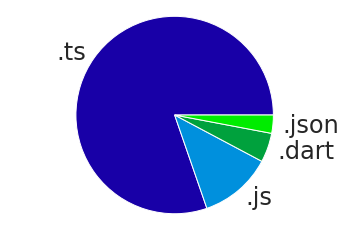

In [19]:
refactor_data = data[data.commit_type == 'refactor']
refactor_data = refactor_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'refactor_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(refactor_data['count'], labels=refactor_data['refactor_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/refactor_types.png')
refactor_data

,feat_file_type,count
32,.ts,14704
20,.js,2896
10,.dart,1435
21,.json,1000


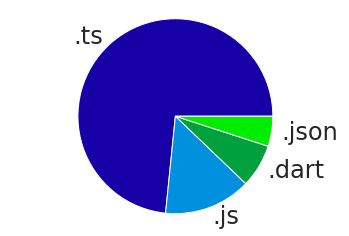

In [20]:
feat_data = data[data.commit_type == 'feat']
feat_data = feat_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'feat_file_type', 'commit_id':'count'}).head(4)
fig, ax = plt.subplots()
ax.pie(feat_data['count'], labels=feat_data['feat_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/feat_types.png')

feat_data

,build_file_type,count
69,.ts,19596
46,.js,8459
48,.json,5579
12,.bazel,4861


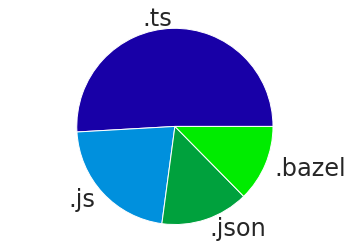

In [23]:
build_data = data[data.commit_type == 'build']
build_data = build_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'build_file_type', 'commit_id':'count'}).head(4)
fig, ax = plt.subplots()
ax.pie(build_data['count'], labels=build_data['build_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/build_types.png')

build_data.head(15)

,test_file_type,count
27,.ts,3355
17,.js,806
19,.json,565
0,.bazel,558


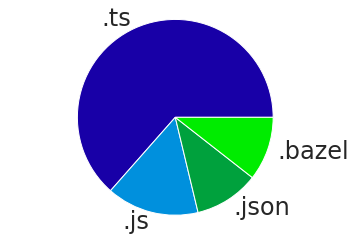

In [24]:
test_data = data[data.commit_type == 'test']
test_data = test_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'test_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(test_data['count'], labels=test_data['test_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/test_types.png')

test_data

,ci_file_type,count
39,.ts,13060
26,.json,1259
25,.js,1238
4,.bazel,864


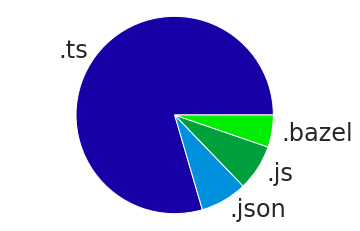

In [25]:
ci_data = data[data.commit_type == 'ci']
ci_data = ci_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'ci_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(ci_data['count'], labels=ci_data['ci_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/ci_types.png')

ci_data

,perf_file_type,count
11,.ts,1895
7,.json,109
6,.js,84
5,.html,54


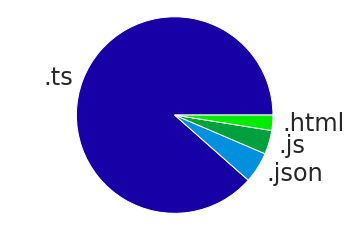

In [26]:
perf_data = data[data.commit_type == 'perf']
perf_data = perf_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'perf_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(perf_data['count'], labels=perf_data['perf_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/perf_types.png')

perf_data

,style_file_type,count
16,.ts,3441
11,.js,1161
5,.dart,417
10,.html,54


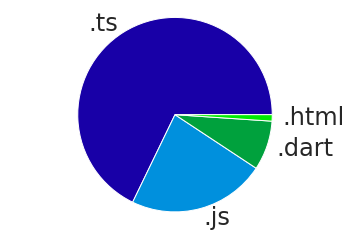

In [27]:
style_data = data[data.commit_type == 'style']
style_data = style_data.groupby('file_type', as_index=False).aggregate({'commit_id': 'count'})\
    .sort_values('commit_id', ascending=False)\
    .rename(columns={'file_type':'style_file_type', 'commit_id':'count'}).head(4)

fig, ax = plt.subplots()
ax.pie(style_data['count'], labels=style_data['style_file_type'], textprops={'fontsize': 24})
ax.axis("equal")
plt.savefig('../../data/images/type_analize/style_types.png')
style_data

In [28]:
types = data.groupby('file_type', as_index=False).aggregate({'file_name':'count'})\
    .sort_values('file_name', ascending=False)\
    .rename(columns={'file_name':'count'}).head(4)
types.head(15)

,file_type,count
83,.ts,116756
56,.js,22727
58,.json,12434
63,.md,9106


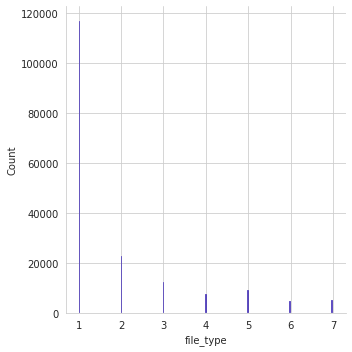